In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\xacol\OneDrive\Desktop\customer personality\marketing_campaign.csv", delimiter='\t') 

# ----------------------------------- Data Exploration ---------------------------------------

In [3]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
df.tail(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2230,7004,1984,Graduation,Single,11012.0,1,0,16-03-2013,82,24,...,9,1,0,0,0,0,0,3,11,0
2231,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,...,8,0,0,0,0,0,0,3,11,0
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,...,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,...,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [5]:
df.shape

(2240, 29)

# ---------------------------------- Data Preprocessing -------------------------------------

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- Only the Income Column has 24 Null Values


In [7]:
df.duplicated().sum()

0

- No Duplicates in the Data

In [8]:
# List of campaign columns to update
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Replace 0 with "Not Accepted" and 1 with "Accepted" for these columns
df[campaign_columns] = df[campaign_columns].replace({0: 'Not Accepted', 1: 'Accepted'})

# Display the updated data to verify changes
df[campaign_columns].head()


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,Not Accepted,Not Accepted,Not Accepted,Not Accepted,Not Accepted,Accepted
1,Not Accepted,Not Accepted,Not Accepted,Not Accepted,Not Accepted,Not Accepted
2,Not Accepted,Not Accepted,Not Accepted,Not Accepted,Not Accepted,Not Accepted
3,Not Accepted,Not Accepted,Not Accepted,Not Accepted,Not Accepted,Not Accepted
4,Not Accepted,Not Accepted,Not Accepted,Not Accepted,Not Accepted,Not Accepted


In [9]:
# Check unique values in each campaign column after replacement
for column in campaign_columns:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in AcceptedCmp1: ['Not Accepted' 'Accepted']
Unique values in AcceptedCmp2: ['Not Accepted' 'Accepted']
Unique values in AcceptedCmp3: ['Not Accepted' 'Accepted']
Unique values in AcceptedCmp4: ['Not Accepted' 'Accepted']
Unique values in AcceptedCmp5: ['Not Accepted' 'Accepted']
Unique values in Response: ['Accepted' 'Not Accepted']


In [10]:
df = df.drop(columns=['Z_Revenue'])

In [11]:
df = df.drop(columns=['Z_CostContact'])

In [12]:
# Map the 'Complain' column values to "complained" and "not complained"
df['Complain'] = df['Complain'].map({1: 'complained', 0: 'not complained'})

# Display the unique values in the 'Complain' column to confirm the change
df['Complain'].unique()

array(['not complained', 'complained'], dtype=object)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


- There are some Outliers in the Dataset

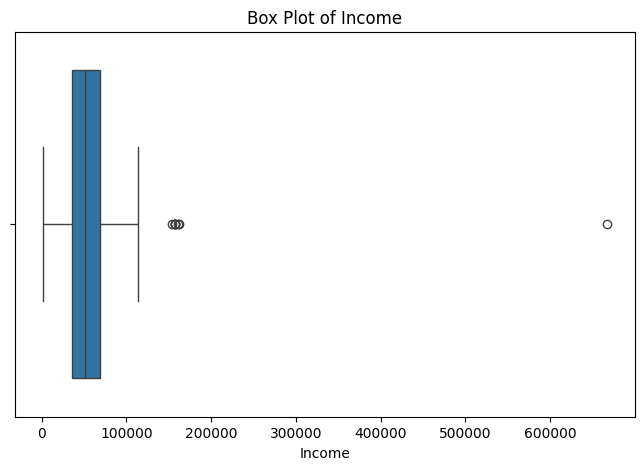

In [14]:

plt.figure(figsize=(8, 5))

sns.boxplot(data=df, x='Income')
plt.title('Box Plot of Income')
plt.xlabel('Income')
plt.show()

In [15]:
# Calculate IQR and remove outliers for each numeric column
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to remove outliers in the current column
    df = df[(df[column] >= min) & (df[column] <= max)]

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,972.0,5567.920782,3249.371837,9.0,2706.75,5426.5,8362.25,11191.0
Year_Birth,972.0,1971.229424,11.005094,1940.0,1964.00,1972.0,1979.00,1996.0
Income,972.0,34589.374486,12036.720675,7500.0,25910.25,34421.0,42554.75,86580.0
Kidhome,972.0,0.790123,0.492148,0.0,1.00,1.0,1.00,2.0
Teenhome,972.0,0.477366,0.527808,0.0,0.00,0.0,1.00,2.0
Recency,972.0,49.033951,29.046854,0.0,24.00,49.0,75.00,99.0
MntWines,972.0,42.339506,57.591712,0.0,8.00,20.0,51.00,532.0
MntFruits,972.0,4.417695,6.317094,0.0,0.00,2.0,6.00,51.0
MntMeatProducts,972.0,21.711934,23.240279,0.0,7.00,14.0,26.00,206.0
MntFishProducts,972.0,6.002058,7.443574,0.0,0.00,3.0,8.00,47.0


- Handled the Outliers in the Dataset

In [17]:
# Calculate the mean of the 'Income' column, ignoring null values
income_mean = df['Income'].mean()

# Fill null values in the 'Income' column with the calculated mean
df['Income'].fillna(income_mean, inplace=True)

In [18]:
import datetime

# Calculate age based on the current year and birth year
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Define a function to categorize ages into ranges
def age_range(age):
    if age < 20:
        return 'Under 20'
    elif 20 <= age < 30:
        return '20-29'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    elif 50 <= age < 60:
        return '50-59'
    elif 60 <= age < 70:
        return '60-69'
    elif 70 <= age < 80:
        return '70-79'
    else:
        return '80+'

# Apply the function to create the 'Age_Range' column
df['Age_Range'] = df['Age'].apply(age_range)

# Verify the unique values
print(df['Age_Range'].unique())


['70-79' '40-49' '30-39' '50-59' '60-69' '20-29' '80+']


- Took the Average for the Null values in the Income column

In [19]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
Age_Range              0
dtype: int64

# Data Preprocessing:
1. Checked for Null values and found 24 Null value in the Income column
2. Checked if there were Duplicates but didn't find any Duplicates
3. Removed the Outliers from the Dataset using IQR Technique 
4. Removed the Null values in the Income column by taking the Average
5. Droped Both columns Z_Revenue and Z_CostContact cause they lack variability and they likely doesn’t add any meaningful information
6. Changed the values in all AcceptedCmp columns and response from 0 and 1 to " accepted " and " not accepted"
7. Changed the values in Complain column from 0 and 1 to " complained " and " not complained "
8. Added column for Age and Age_Group and Income_Range

- Now the Dataset is organized and Cleaned from Outliers, Null values and Duplicates

# ----------------------------------- Data Visualization --------------------------------------

In [20]:
palette = 'viridis'

1. Education Level Distribution

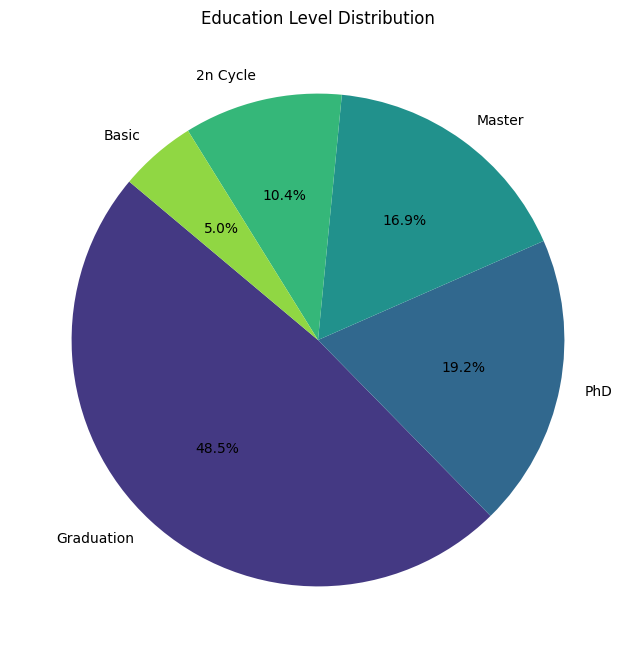

In [21]:
education_counts = df['Education'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette(palette, len(education_counts)))
plt.title('Education Level Distribution')
plt.show()

2. Age Group Distribution

C:\Users\xacol\AppData\Local\Temp\ipykernel_12748\716818775.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age_Group', palette=palette)


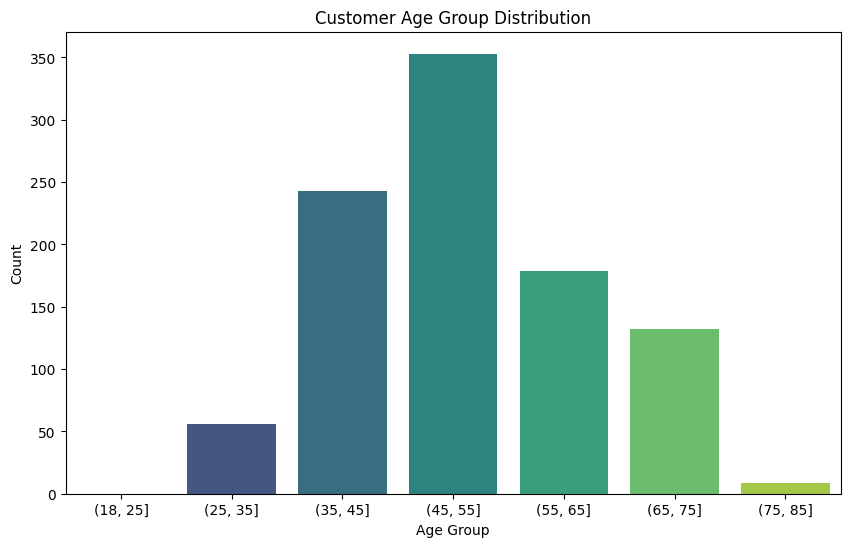

In [22]:
df['Age'] = 2023 - df['Year_Birth']
age_bins = [18, 25, 35, 45, 55, 65, 75, 85]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group', palette=palette)
plt.title('Customer Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

3. Total Spending per Product Category

C:\Users\xacol\AppData\Local\Temp\ipykernel_12748\799592867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_spending.index, y=product_spending.values, palette=palette)


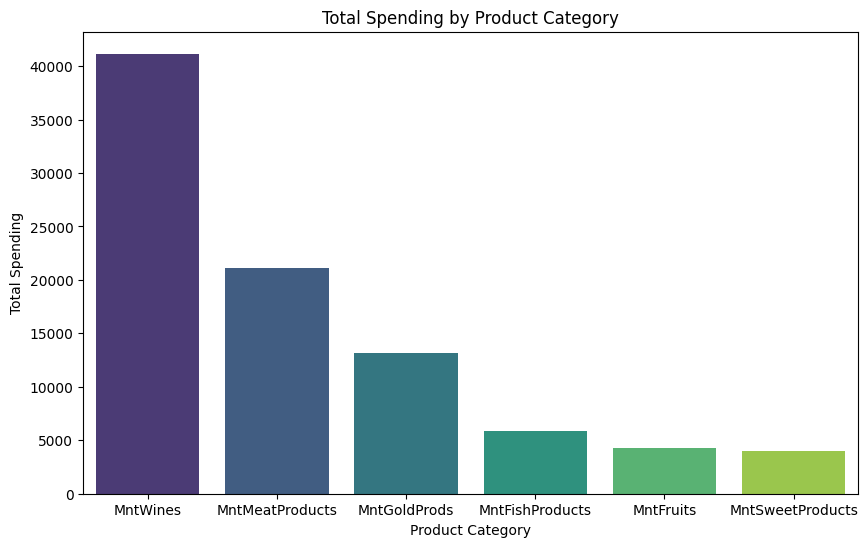

In [23]:
product_spending = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
product_spending.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=product_spending.index, y=product_spending.values, palette=palette)
plt.title('Total Spending by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.show()

4. Average Monthly Web Visits by Income Range

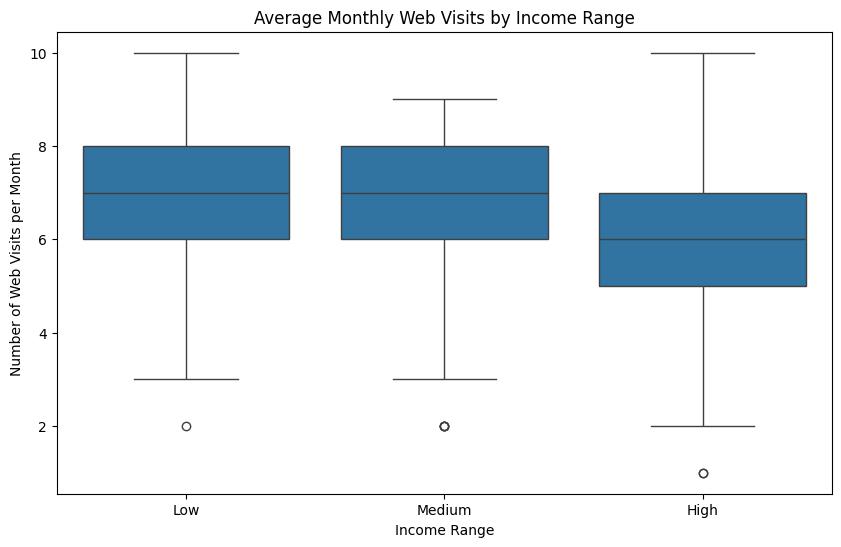

In [24]:
df['Income_Range'] = pd.qcut(df['Income'], q=3, labels=["Low", "Medium", "High"])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Income_Range', y='NumWebVisitsMonth', data=df)
plt.title('Average Monthly Web Visits by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Number of Web Visits per Month')
plt.show()

In [25]:
df.to_csv(r"C:\Users\xacol\OneDrive\Desktop\customer personality\marketing_campaign.csv", index=False)